<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [235]:
class City(object):
    """docstring"""
    AGENT1_cell = 0
    AGENT2_cell = 1
    FREE_cell = 2
    BORDER_cell = -1
    def __init__(self, N, r, num_agents=2):
        """Constructor"""
        self.r = r
        self.N = N

        # Initialize map for 2 agents
        self.map = np.ones((self.N+2, self.N+2)) #to get borders
        self.map = self.map*self.BORDER_cell # make all cells free at the beggining
        for i in range(1,self.N+1):
          for j in range(1,self.N+1):
            if(np.random.rand() < 0.66):
              if(np.random.rand() < 0.5):
                self.map[i][j] = self.AGENT1_cell
              else:
                self.map[i][j] = self.AGENT2_cell
            else:
              self.map[i][j] = self.FREE_cell
    

    def plotCity(self):
      plt.figure(figsize=(5, 5))
      plt.title("White are free, black and purple are agents")
      plt.imshow(self.map, cmap=cm.gnuplot2, extent=(-2, 2, -2, 2))

    def calculateAndMove(self):
      toMove = []
      for i in range(1, self.N+1):
        for j in range(1, self.N+1):
          if(self.map[i][j] == self.AGENT1_cell or self.map[i][j] == self.AGENT2_cell):
            n1 = self.calculateNeighbours(i, j)
            if(n1 < self.r):
              toMove.append([i,j])
      self.moveAgents(toMove)
    
    def moveAgents(self, toMove):
      for idx in toMove:
        freePlaces = np.where(self.map == self.FREE_cell)
        whereToMove = random.randint(0, len(freePlaces[0])-1)
        self.map[freePlaces[0][whereToMove]][freePlaces[1][whereToMove]] = self.map[idx[0]][idx[1]]
        self.map[idx[0]][idx[1]] = self.FREE_cell
        
    def calculateNeighbours(self, cur_i, cur_j):
      neighbours = []
      agentNum = self.map[cur_i][cur_j]
      start_i = cur_i - 1
      start_j = cur_j - 1
      for i in range(start_i, start_i + 3, 1):
        for j in range(start_j, start_j + 3, 1):
          if(i != cur_i and j != cur_j):
            neighbours.append(self.map[i][j])
      numOfNeighbouringAgents = neighbours.count(agentNum)
      numOfNeighboursAround = neighbours.count(self.AGENT1_cell) + neighbours.count(self.AGENT2_cell) + neighbours.count(self.FREE_cell)
      return 1.0*numOfNeighbouringAgents/numOfNeighboursAround

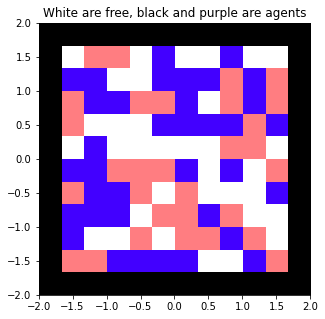

In [261]:
city = City(10,0.4)
city.plotCity()

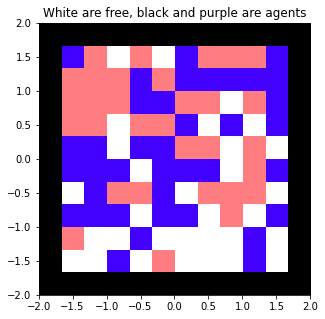

In [258]:
city.calculateAndMove()
city.plotCity()

In [262]:
import os
from tqdm import tqdm
import imageio

def save_img(fname):
  plt.savefig(fname)
  plt.close()

def createGIF(c_density, duration=15):
  images = []
  name="city_2"

  for i in range(c_density):
    city.calculateAndMove()
    plt.figure(figsize=(5, 5))
    #plt.title("White are free, black and purple are agents")
    plt.imshow(city.map, cmap=cm.gnuplot2, extent=(-2, 2, -2, 2))

    fname = f'{name}_{i}.png'
    save_img(fname)
    images.append(imageio.imread(fname))
    os.remove(fname)

  fname = f'{name}.gif'
  imageio.mimsave(fname, images, fps = c_density / duration)

createGIF(50,10)